In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy import stats
import scipy

In [2]:
df = pd.read_csv("VR_Participants - Co-Presence.csv", delimiter=",")

In [3]:
df = df.dropna()
df

,PID,Task,condition,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,11,1,real,1,1,2,-2,1,1,1,...,3,1,0,2,3,2,-2,3,0,1
1,11,2,none,1,1,1,-1,1,0,1,...,1,1,0,0,2,2,-2,2,0,1
2,11,3,fake,0,1,-1,1,1,1,1,...,0,0,-1,0,2,1,-2,2,-2,2
3,12,1,real,1,1,2,1,0,1,2,...,2,2,2,2,3,1,-3,1,1,1
4,12,2,none,-2,-1,-1,2,0,0,-2,...,-2,-1,-2,0,-1,-1,-2,1,-1,2
5,12,3,fake,1,1,1,-2,1,1,1,...,2,2,2,2,3,2,-3,1,1,0
6,21,1,none,-2,-3,-3,-2,-2,-2,-3,...,-2,-2,-3,-2,0,0,1,3,-3,3
7,21,2,fake,-2,-2,-2,-1,-3,-3,-2,...,-3,-3,-2,-3,-1,-1,-2,3,-3,2
8,21,3,real,1,1,1,0,-2,-2,-2,...,-1,-1,-2,0,1,1,0,3,-2,2
9,22,1,none,1,0,1,-2,-2,1,2,...,-2,0,2,1,3,3,-3,1,-2,3


In [4]:
questions = range(1,19)

for c in questions:
    df[str(c)] = df[str(c)].apply(lambda x: x + 4)

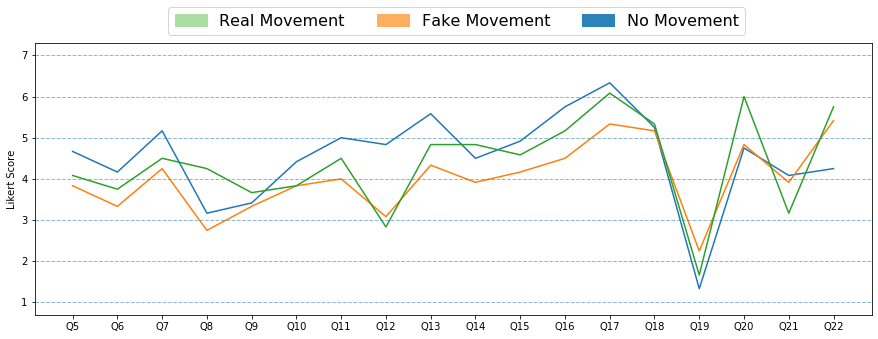

In [5]:
fig, ax = plt.subplots(1,figsize = (15,5))

plt.rcParams.update({'font.size': 16})

question_labels = ['Real Movement', 'Fake Movement', 'No Movement']
colors = ['#abdda4','#fdae61','#2b83ba','#d7191c']


patches = []
for i in range(len(question_labels)):
    patch = mpatches.Patch(color=colors[i], label=question_labels[i])
    patches.append(patch)
    
for y,c in enumerate(df.condition.unique()):
    df_temp = df[(df.condition == c)]
    tmp = []
    for i,q in enumerate(questions):
        #print(df_temp[str(q)].mean())
        tmp.append(df_temp[str(q)].mean())
    ax.plot(questions,tmp, label=c)
#fig.legend()
#plt.xticks(questions)
ax.set_ylabel("Likert Score")
plt.legend(handles = patches,ncol = 3, bbox_to_anchor=(0.15, 1))
plt.xticks(range(1,19), ["Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19", "Q20", "Q21", "Q22"])

for i in range(1,8):
    ax.axhline(y=i, xmin=0, xmax=21, linestyle = "--", alpha = 0.5,linewidth = 1, label=False)

plt.savefig("co-presence.pdf", bbox_inches="tight")
plt.savefig("co-presence.svg", bbox_inches="tight")
plt.show()

In [16]:
pos = []
for i in range(18*4):
    if i%4 == 0:
        continue
    pos.append(i)

pos

[1,
 2,
 3,
 5,
 6,
 7,
 9,
 10,
 11,
 13,
 14,
 15,
 17,
 18,
 19,
 21,
 22,
 23,
 25,
 26,
 27,
 29,
 30,
 31,
 33,
 34,
 35,
 37,
 38,
 39,
 41,
 42,
 43,
 45,
 46,
 47,
 49,
 50,
 51,
 53,
 54,
 55,
 57,
 58,
 59,
 61,
 62,
 63,
 65,
 66,
 67,
 69,
 70,
 71]

In [7]:
16, 17, 19, & 6, 12, 22
12, 13, 15, & 2, 8, 18

SyntaxError: invalid syntax (<ipython-input-7-9ba55e13d20d>, line 1)

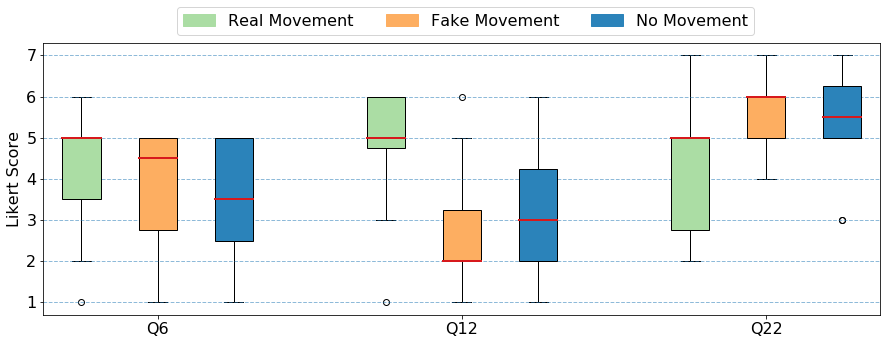

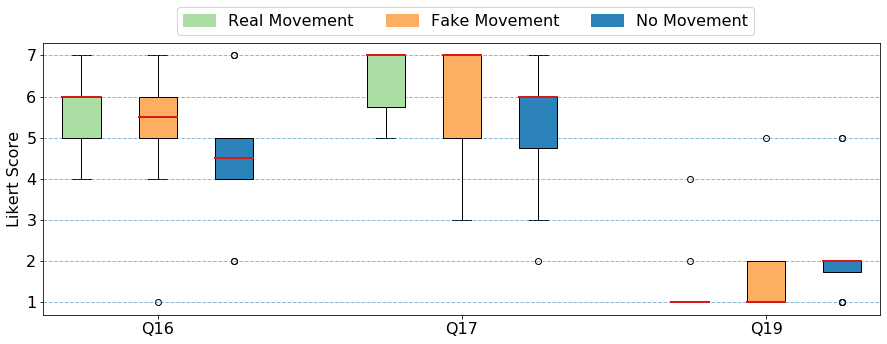

In [23]:
pos = pos[:9]

question_labels = ['Real Movement', 'Fake Movement', 'No Movement']
colors = ['#abdda4','#fdae61','#2b83ba','#d7191c']

questions1 = ["2", "8", "18"]

questions2 = ["12", "13", "15"]

patches = []
for i in range(len(question_labels)):
    patch = mpatches.Patch(color=colors[i], label=question_labels[i])
    patches.append(patch)

k = 1
for j in [questions1, questions2]:
    
    fig, ax = plt.subplots(1,figsize = (15,5))

    plt.rcParams.update({'font.size': 16})

    
    data = []
    for i, q in enumerate(j):
        
        real = df[df.condition == "real"][q].values
        fake = df[df.condition == "fake"][q].values
        none = df[df.condition == "none"][q].values
        data.append(real)
        data.append(fake)
        data.append(none)
    
    
    bp = ax.boxplot(data, positions = pos, patch_artist=True)

    #fig.legend()
    #plt.xticks(questions)
    ax.set_ylabel("Likert Score")
    plt.legend(handles = patches,ncol = 3, bbox_to_anchor=(0.15, 1))
    if(k == 1):
        plt.xticks(np.arange(2, 12, 4), ["Q6", "Q12", "Q22"])
    else: 
        plt.xticks(np.arange(2, 12, 4), ["Q16", "Q17", "Q19"])
            
    i = 1
    for box in bp['boxes']:
        if i % 3 == 1:
            # change fill color
            box.set( facecolor = colors[0] )
        elif i%3 == 2:
            box.set( facecolor = colors[1] )
        else:
            # change fill color
            box.set( facecolor = colors[2] )
        i += 1

    for median in bp['medians']:
        median.set(color=colors[3], linewidth=2)
        #ax.set_xticklabels(["Low_level", "High_level"])


    for i in range(1,8):
        ax.axhline(y=i, xmin=0, xmax=21, linestyle = "--", alpha = 0.5,linewidth = 1, label=False)

    plt.savefig("co-presence" + str(k) + ".pdf", bbox_inches="tight")
    plt.savefig("co-presence" + str(k) + ".svg", bbox_inches="tight")
    plt.show()
    k += 1

In [5]:
pos = []
for i in range(6*4):
    if i%4 == 0:
        continue
    pos.append(i)

pos

[1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23]

[array([1, 2, 3, 4, 5, 6]), array([ 7,  8,  9, 10, 11, 12]), array([13, 14, 15, 16, 17, 18])]


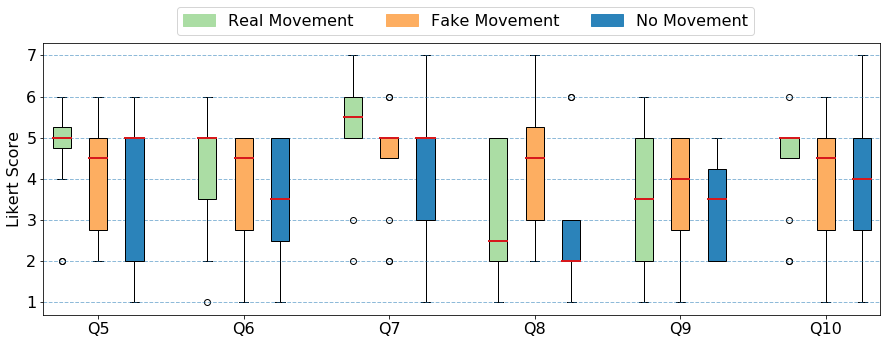

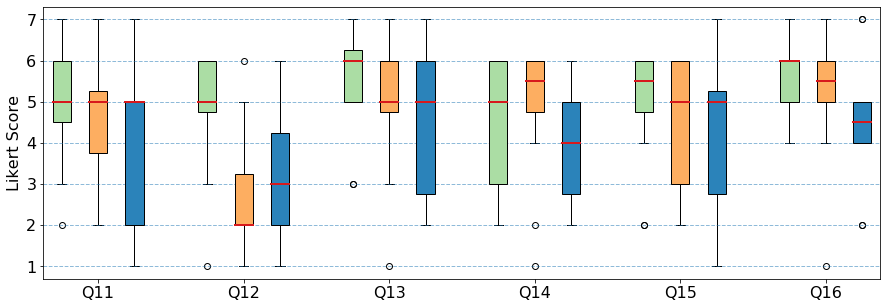

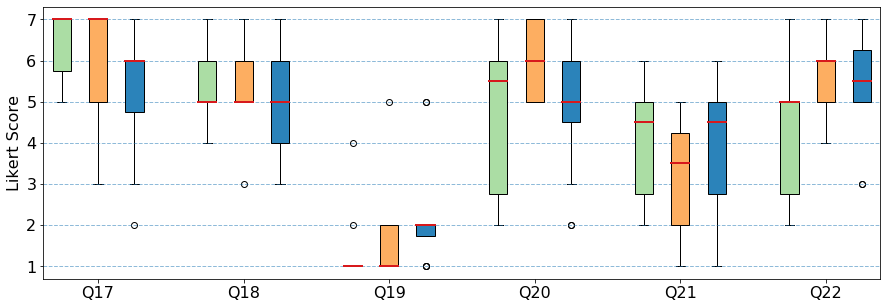

In [16]:
question_labels = ['Real Movement', 'Fake Movement', 'No Movement']
colors = ['#abdda4','#fdae61','#2b83ba','#d7191c']

questions = np.arange(1, 19)

qlabels = [["Q5", "Q6", "Q7", "Q8", "Q9", "Q10"], ["Q11", "Q12", "Q13", "Q14", "Q15", "Q16"], 
      ["Q17", "Q18", "Q19", "Q20", "Q21", "Q22"]]

qs = [np.arange(1, 7), np.arange(7, 13), np.arange(13, 19)]
print(qs)
patches = []
for i in range(len(question_labels)):
    patch = mpatches.Patch(color=colors[i], label=question_labels[i])
    patches.append(patch)

for k in range(len(qs)): 
    
    fig, ax = plt.subplots(1,figsize = (15,5))

    plt.rcParams.update({'font.size': 16})

    
    data = []
    for i, q in enumerate(qs[k]):
        
        real = df[df.condition == "real"][str(q)].values
        fake = df[df.condition == "fake"][str(q)].values
        none = df[df.condition == "none"][str(q)].values
        data.append(real)
        data.append(fake)
        data.append(none)


    bp = ax.boxplot(data, positions = pos, patch_artist=True)

    
    ax.set_ylabel("Likert Score")
    if(k == 0):
        plt.legend(handles = patches,ncol = 3, bbox_to_anchor=(0.15, 1))
    
    plt.xticks(np.arange(2, 24, 4), qlabels[k])



    i = 1
    for box in bp['boxes']:
        if i % 3 == 1:
            # change fill color
            box.set( facecolor = colors[0] )
        elif i%3 == 2:
            box.set( facecolor = colors[1] )
        else:
            # change fill color
            box.set( facecolor = colors[2] )
        i += 1

    for median in bp['medians']:
        median.set(color=colors[3], linewidth=2)
        #ax.set_xticklabels(["Low_level", "High_level"])


    for i in range(1,8):
        ax.axhline(y=i, xmin=0, xmax=21, linestyle = "--", alpha = 0.5,linewidth = 1, label=False)

    plt.savefig("co-presenceAll" + str(k) + ".pdf", bbox_inches="tight")
    plt.savefig("co-presenceAll" + str(k) + ".svg", bbox_inches="tight")
    plt.show()

In [ ]:
question_labels = ['Real Movement', 'Fake Movement', 'No Movement']
colors = ['#abdda4','#fdae61','#2b83ba','#d7191c']

questions = np.arange(1, 19)



patches = []
for i in range(len(question_labels)):
    patch = mpatches.Patch(color=colors[i], label=question_labels[i])
    patches.append(patch)

    
fig, ax = plt.subplots(1,figsize = (20,5))

plt.rcParams.update({'font.size': 16})


data = []
for i, q in enumerate(questions):
    
    real = df[df.condition == "real"][str(q)].values
    fake = df[df.condition == "fake"][str(q)].values
    none = df[df.condition == "none"][str(q)].values
    data.append(real)
    data.append(fake)
    data.append(none)


bp = ax.boxplot(data, positions = pos, patch_artist=True)

#fig.legend()
#plt.xticks(questions)
ax.set_ylabel("Likert Score")
plt.legend(handles = patches,ncol = 3, bbox_to_anchor=(0.15, 1))

plt.xticks(np.arange(2, 72, 4), ["Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q16", "Q17", "Q18", "Q19", "Q20", "Q21", "Q22"])
 


i = 1
for box in bp['boxes']:
    if i % 3 == 1:
        # change fill color
        box.set( facecolor = colors[0] )
    elif i%3 == 2:
        box.set( facecolor = colors[1] )
    else:
        # change fill color
        box.set( facecolor = colors[2] )
    i += 1

for median in bp['medians']:
    median.set(color=colors[3], linewidth=2)
    #ax.set_xticklabels(["Low_level", "High_level"])


for i in range(1,8):
    ax.axhline(y=i, xmin=0, xmax=21, linestyle = "--", alpha = 0.5,linewidth = 1, label=False)


plt.show()